In [1]:
from simulation import *
import numpy as np
import matplotlib.pyplot as plt


def sim_vlad_probability(S):
    return 100 * (S[2] + 1 / 2)


def theory_vlad_probability(Hx, H_dot):
    return np.exp(-np.pi * Hx * Hx / H_dot * -0.09162) * 100



Final S (two wires): [0.0, -0.3341026778772588, 0.37198820095437335]


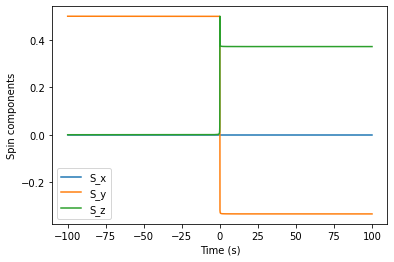

In [2]:
Sf, ts, spins = Particle(
    [1000, 0, 0],
    np.zeros(3),
    generate_two_wires(10, (10, 0), (-10, 0)),
    [-100, 100],
    [0, 1 / 2, 0],
).simulate_with_output()
print(f"Final S (two wires): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


Final S (Vladimirskii): [0.038128768808304646, 0.4985431238584064, 0.0018758303140288075]
Corresponding realignment probability: 50.18758303140288%
Theoretical realignment probability: 49.97872272254392%


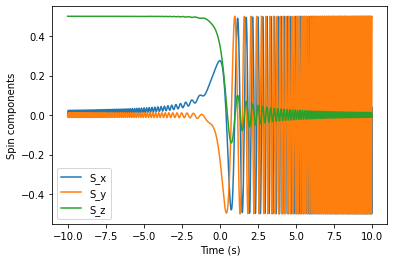

In [3]:
Hx = 10
H_dot = -41.5
Sf, ts, spins = Particle(
    np.empty(3), np.empty(3), [Vladimirskii(Hx, H_dot)], [-10, 10], [0, 0, 1 / 2]
).simulate_with_output()
print(f"Final S (Vladimirskii): {Sf}")
print(f"Corresponding realignment probability: {sim_vlad_probability(Sf)}%")
print(f"Theoretical realignment probability: {theory_vlad_probability(Hx, H_dot)}%")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


In [4]:
Sf_rand_line = run_two_wires_line(1000, 10, (10, 0), (-10, 0), 100, [-100, 100])
print(f"Final S (rand line): {Sf_rand_line}")

shape = "square"
Sf_shape = run_two_wires_shape_2D(1000, 10, (10, 0), (-10, 0), 100, [-100, 100], shape)
print(f"Final S ({shape}): {Sf_shape}")


Final S (rand line): [ 0.4241999  -0.00122985  0.00639209]
Final S (square): [0.39934081 0.00134372 0.00895564]


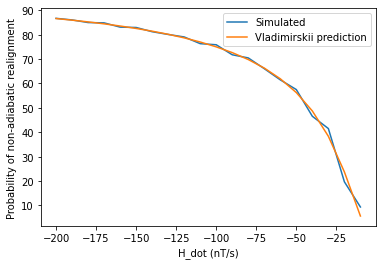

In [5]:
Hx = 10
H_dots = np.linspace(-10, -200, 20)
sim_ps = [
    sim_vlad_probability(
        Particle(
            np.empty(3),
            np.empty(3),
            [Vladimirskii(Hx, H_dot)],
            [-10, 10],
            [0, 0, 1 / 2],
        ).simulate()
    )
    for H_dot in H_dots
]

vlad_ps = [theory_vlad_probability(Hx, H_dot) for H_dot in H_dots]

plt.plot(H_dots, sim_ps, label="Simulated")
plt.plot(H_dots, vlad_ps, label="Vladimirskii prediction")
plt.xlabel("H_dot (nT/s)")
plt.ylabel("Probability of non-adiabatic realignment")
plt.legend()
plt.show()


Final S (two wires, particle offset closer to top wire): [-0.3326271249195822, -0.2929443254815592, 0.231392591691733]


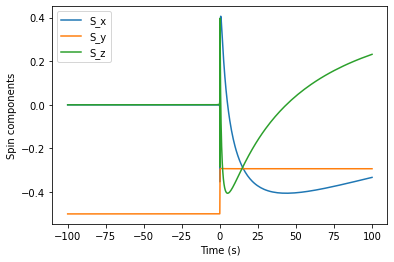

In [6]:
Sf, ts, spins = Particle(
    [1000, 0, 0],
    [0, 4.5, 0],
    generate_two_wires(10, (10, 0), (10, 0)),
    [-100, 100],
    [0, -1 / 2, 0],
).simulate_with_output()

print(f"Final S (two wires, particle offset closer to top wire): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()
